# Ejercicio11

Utilizando los datos en data/fitting.txt calcule la evidencia bayesiana para M modelos diferentes, donde cada modelo es un polinomio de orden m. Prepare una grafica de la evidencia como funcion del orden del polinomio. El prior para los coeficientes del polinomio debe ser uniforme entre -1 y 1, y el orden de los polinomios debe variar entre 0<=m<=20.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Definimos el modelo de tal forma que nos sirva para un polinomio de cualquier grado.
def model(x, c):
    n_dim = len(c)
    y = np.zeros(len(x))
    for i in range(n_dim):
        y += c[i] * (x**i)
    return y

Para usar Bayes planteamos la siguiente verosimilitud
$$
\mathcal{L}({x_i, y_i, \sigma_i}|m, b) = \prod_{i=1}^{N}\exp\left[-\frac{1}{2}\left(\frac{y_i - y_{model}(x_i, m, b)}{\sigma_i}\right)^2\right]
$$

In [3]:
#Bueno, en realidad calculamos el logaritmo de la función de likelihood.
def loglike(x_obs, y_obs, y_sigma_obs, params):
    y_model = model(x_obs, params)
    d = -0.5 * ((y_model - y_obs)/y_sigma_obs)**2
    #Debemos agregarle un factor de normalización ya que básicamente nuestra función de verosimilitud tiene la forma
    #de una gaussiana. Lo hacemos en este caso porque es necesaria la normalización para calcular la evidencia bayesiana.
    norm = np.sqrt(2.0 * np.pi * y_sigma_obs **2)
    #norm por ser un factor de normalización está en el denominador. Pero lo dejamos así y restamos su logaritmo para tener
    #esto en cuenta.
    #Con los logaritmos la multiplicatoria se vuelve una suma.
    return np.sum(d - np.log(norm))

In [4]:
#Definimos la evidencia bayesiana, que calcularemos para cada grado del polinomio. Por eso lo recibe como parámetro.
def evidence(x_obs, y_obs, y_sigma_obs, n_dim=1, N = 100000):
    #Generamos (N*n_dim) números aleatorios en este rango. Donde N es la cantidad de puntos aleatorios que generamos para cada 
    #parámetro.
    #Aquí tenemos en cuenta que el prior esté entre -1 y 1.
    params = np.random.random(N * n_dim) * 2.0 - 1.0
    #El número de filas va a corresponder al número de iteraciones que queremos.
    #El número de columnas corresponde al número de dimensiones (grado del polinomio). Así, este método funciona para 
    #cualquier polinomio.
    params = np.reshape(params, [N, n_dim])
    loglike_params = np.zeros(N)
    #Calculamos la función de verosimilitud para cada set de parámetros aleatorios generado. Es decir, lo hacemos N veces.
    for i in range(N):
        loglike_params[i] = loglike(x_obs, y_obs, y_sigma_obs, params[i,:])
    #La evidencia es el promedio de la función de verosimilitud para todos los puntos aleatorios generados.
    e = np.exp(loglike_params)    
    return np.mean(e)

Text(0,0.5,'y')

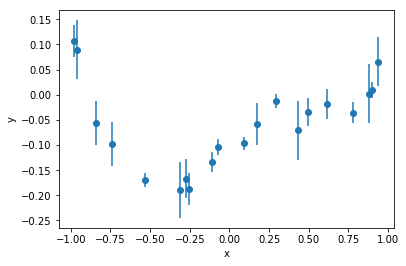

In [6]:
#Cargamos los datos y los graficamos
data = np.loadtxt('fitting.txt')
x_obs = data[:,0]
y_obs = data[:,1]
y_sigma_obs = data[:,2]
plt.errorbar(x_obs, y_obs, y_sigma_obs, fmt='o')
plt.xlabel('x')
plt.ylabel('y')

In [11]:
#Calculamos la evidencia para 21 dimensiones (grados del polinomio)
n_dims = 21
e = np.zeros(n_dims)
for i in range(n_dims):
    e[i] = evidence(x_obs, y_obs, y_sigma_obs, n_dim=i+1)

(0, 20)

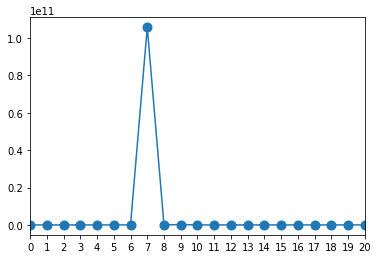

In [13]:
#Graficamos los resultados. Notar el pico en el grado 7. Esto quiere decir que este fue el mejor fit para los datos observados.
plt.scatter(range(n_dims),e, linewidth=4)
plt.plot(range(n_dims),e)
_ = plt.xticks(np.linspace(0,20,21))
plt.xlim([0,20])